In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/dsworkshop74/spam_vs_ham/refs/heads/main/spamhamdata.csv',sep='\t',names=['class','text']) # Read the dataset.
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(s):
    s2 = ''
    for i in s:
        if i not in string.punctuation:
            s2 += i

    return s2

In [ ]:
df['text'] = df['text'].apply(lambda x:remove_punct(x))

In [ ]:
df.head()

,class,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [ ]:
df.shape

(5572, 2)

In [ ]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
docs = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "the cat chased the mouse"
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(docs)
print(embeddings.shape)

(3, 384)


In [ ]:
embeddings

array([[ 1.91957615e-02,  1.20085366e-01,  1.59598321e-01,
         6.70658872e-02,  5.00748344e-02, -2.59187520e-02,
         5.64681962e-02, -9.28577706e-02, -3.76114510e-02,
         6.32382557e-03, -4.28877436e-02,  4.02834173e-03,
         4.72778408e-03,  3.24676037e-02,  4.95197847e-02,
         5.29818274e-02, -4.04454805e-02, -2.14836765e-02,
        -3.02760433e-02,  2.20858604e-02, -1.60775751e-01,
         8.08077827e-02, -2.80130766e-02,  8.06255788e-02,
        -2.85814609e-02,  5.35818487e-02,  1.26382615e-02,
         4.79190908e-02,  5.71116712e-03, -3.25830877e-02,
        -2.61571482e-02,  8.00957754e-02,  1.47315515e-02,
        -3.24081779e-02, -4.12552133e-02, -9.68343485e-03,
         5.00835187e-04, -1.56286806e-01, -6.77877292e-02,
         4.88779210e-02,  1.88976098e-02, -7.97722638e-02,
         2.43868213e-02,  5.46693988e-03,  1.10656684e-02,
        -7.77951442e-03, -2.20388137e-02,  3.50319482e-02,
         1.06080167e-01, -4.72451514e-03, -5.78185767e-0

In [ ]:
df.head()

,class,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [ ]:
X = df['text']
y = df['class']

In [ ]:
X

,text
0,go until jurong point crazy available only in ...
1,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup fina...
3,u dun say so early hor u c already then say
4,nah i dont think he goes to usf he lives aroun...
...,...
5567,this is the 2nd time we have tried 2 contact u...
5568,will ü b going to esplanade fr home
5569,pity was in mood for that soany other suggest...
5570,the guy did some bitching but i acted like id ...


In [ ]:
y

,class
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [ ]:
df.shape

(5572, 2)

In [ ]:
X.values

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
       ..., 'pity  was in mood for that soany other suggestions',
       'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], dtype=object)

In [ ]:
from tqdm import tqdm

vector = []
for text in tqdm(X):
    vector.append(model.encode(text))

vector = np.array(vector)

100%|██████████| 5572/5572 [02:57<00:00, 31.40it/s]


In [ ]:
vector.shape

(5572, 384)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2)

In [ ]:
X_train.shape,y_train.shape

((4457, 384), (4457,))

In [ ]:
X_test.shape,y_test.shape

((1115, 384), (1115,))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9786868189610327
Test Accuracy: 0.9658263172831332


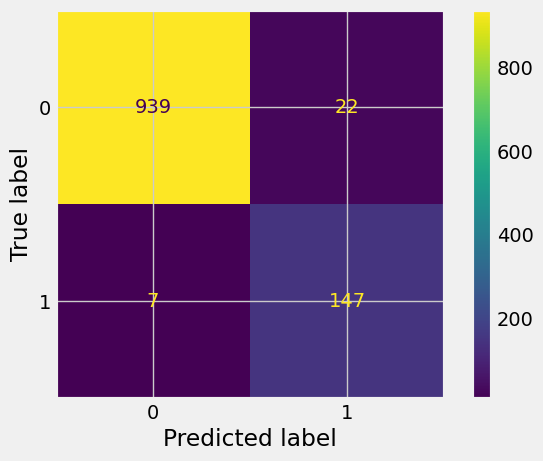

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [ ]:
param_grid = {'penalty':['l1', 'l2'],
              'C':[0.01,0.1,1,10,100],
              'class_weight':[None,'balanced']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_serach_cv = GridSearchCV(lr,
                              param_grid,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              cv=3)

In [ ]:
grid_serach_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(**grid_serach_cv.best_params_)
lr.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced')

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9939808462427423
Test Accuracy: 0.9694683568252767


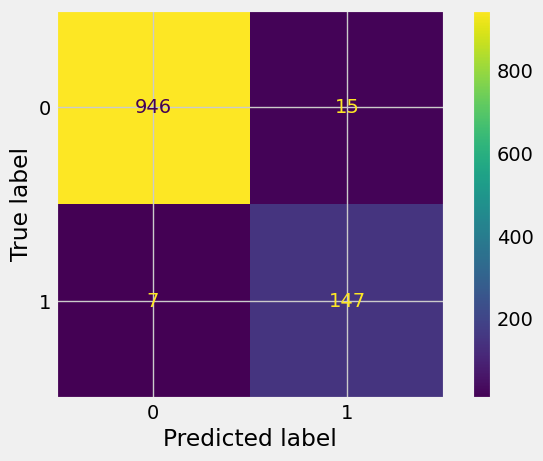

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [ ]:
147/(147+7)

0.9545454545454546

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.8973742178736976


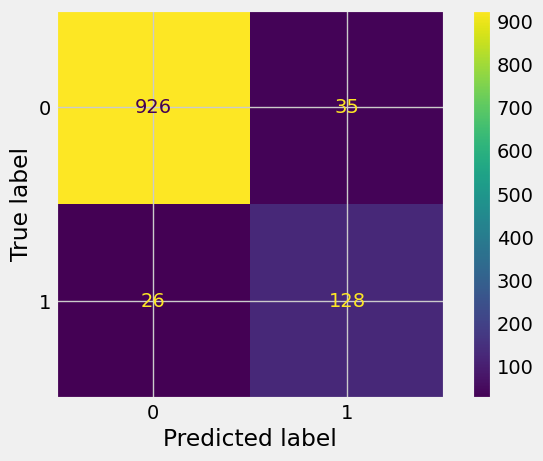

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [ ]:
128/(128+26)

0.8311688311688312

In [ ]:
param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(10,101,5)),
              'class_weight':[None,'balanced']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_serach_cv = GridSearchCV(dt,
                              param_grid,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              cv=3)

In [ ]:
grid_serach_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                       60, 65, 70, 75, 80, 85, 90, 95, 100],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(**grid_serach_cv.best_params_)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9988354037267081
Test Accuracy: 0.8971242077381516


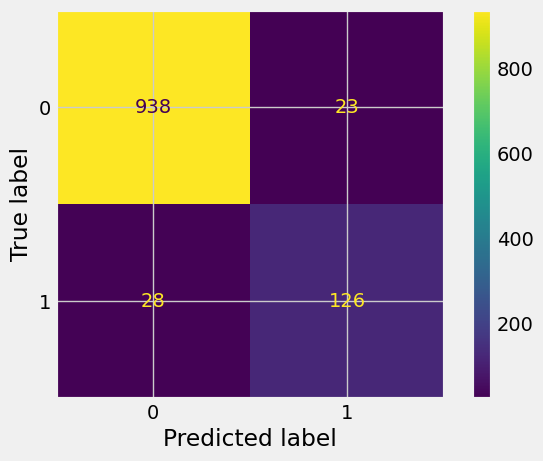

In [ ]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()